In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import scipy.odr as odr
plt.rcParams["text.usetex"] = True
plt.rcParams["font.serif"] = ["Computer Modern"]
plt.rcParams["font.family"] = ["serif", "STIXGeneral"]

params = {
    "text.usetex": True,
    "axes.grid": True,
    "axes.titlesize": 30,
    "axes.labelsize": 20,
    "xtick.labelsize": 20,
    "ytick.labelsize": 20,
    "savefig.dpi": 300,
}
plt.rcParams.update(params)

# Q1

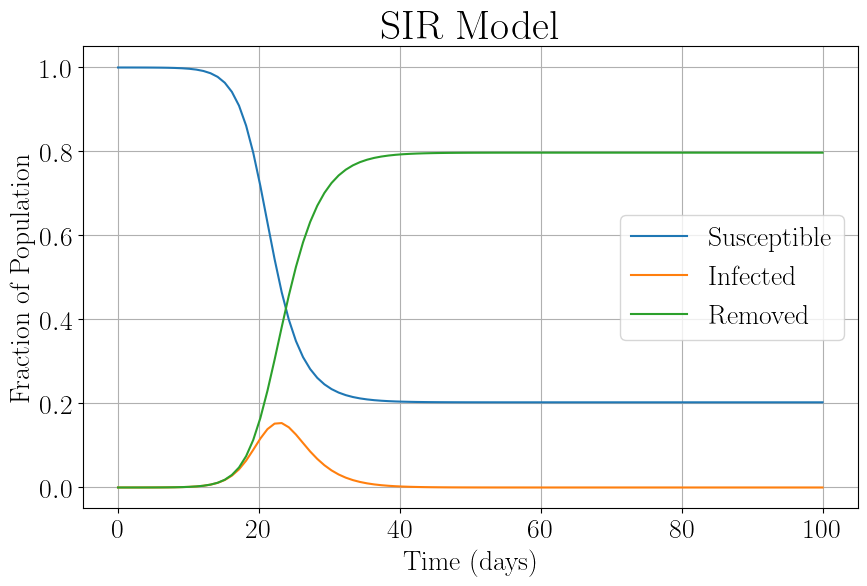

In [2]:
gamma = 1/2
beta = 2 * gamma
I0 = 0.00001
R0 = 0 
S0 = 1 - I0 - R0

initial_conditions = [S0, I0, R0]
t_span = (0, 100)
t_eval = np.linspace(0, 100, 100)

def sir_model(t, y, beta, gamma):
    S, I, R = y
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    dR_dt = gamma * I
    return [dS_dt, dI_dt, dR_dt]


solution = solve_ivp(sir_model, t_span, initial_conditions, args=(beta, gamma), t_eval=t_eval)
S, I, R = solution.y

plt.figure(figsize=(10,6))
plt.plot(solution.t, S, label='Susceptible')
plt.plot(solution.t, I, label='Infected')
plt.plot(solution.t, R, label='Removed')
plt.xlabel('Time (days)')
plt.ylabel('Fraction of Population')
plt.title('SIR Model')
plt.legend(prop= dict(size=20))
plt.savefig("SIRMODEL.pdf",format="pdf", bbox_inches="tight",dpi=300)

# Q2

In [3]:
data = np.array([[-0.819, 0.349, 8.663, 0.123], 
                 [0.618, 0.234, 11.481, 0.243],
                 [0.552, 0.472, 10.189, 0.134], 
                 [0.651, 0.469, 10.920, 0.233],
                 [0.437, 0.382, 10.189, 0.276], 
                 [0.564, 0.163, 11.228, 0.253],
                 [-0.205, 0.549, 10.403, 0.183], 
                 [1.281, 0.440, 11.153, 0.277],
                 [2.772, 0.126, 14.255, 0.176], 
                 [3.447, 0.323, 14.233,0.110]]).T

Best-fit parameters:
a = 1.45
b = 10.08


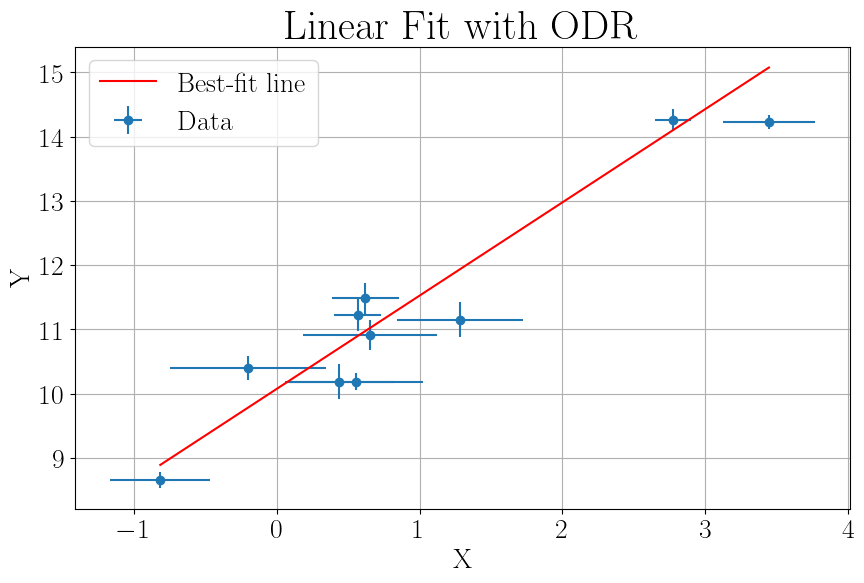

In [4]:
X = data[0]
X_error = data[1]
Y = data[2]
Y_error = data[3]

def linear_model(B, x):
    return B[0] * x + B[1]

linear = odr.Model(linear_model)

rdata = odr.RealData(X, Y, sx=X_error, sy=Y_error)

odr_model = odr.ODR(rdata, linear, beta0=[1, 1])

output = odr_model.run()

a, b = output.beta

print(f"Best-fit parameters:\na = {a:.2f}\nb = {b:.2f}")


x_fit = np.linspace(min(X), max(X), 100)
y_fit = a * x_fit + b

plt.figure(figsize=(10,6))
plt.errorbar(X, Y, xerr=X_error, yerr=Y_error, fmt='o', label='Data')
plt.plot(x_fit, y_fit, label='Best-fit line', color='red')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(prop= dict(size=20))
plt.title('Linear Fit with ODR')
plt.savefig("LinearFit.pdf",format="pdf", bbox_inches="tight",dpi=300)